In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/thomassimmons/c/d/datasets/retail_store_sales.csv")

In [4]:
df.shape

(12575, 11)

In [17]:
df.isnull().sum()

transaction_id      0
customer_id         0
category            0
item                0
price_per_unit      0
quantity            0
total_spent         0
payment_method      0
location            0
transaction_date    0
discount_applied    0
dtype: int64

In [12]:
df.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [16]:
df = df.dropna(subset = ['item', 'price_per_unit', 'quantity', 'total_spent', 'discount_applied'])

In [18]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

/var/folders/kf/nt6wlgn90dvc9wsk7ttkqs4w0000gn/T/ipykernel_43368/3405637112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')


In [22]:
df['month'] = df['transaction_date'].dt.to_period('M')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Patisserie'),
  Text(1, 0, 'Milk Products'),
  Text(2, 0, 'Butchers'),
  Text(3, 0, 'Food'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Electric household essentials'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Computers and electric accessories')])

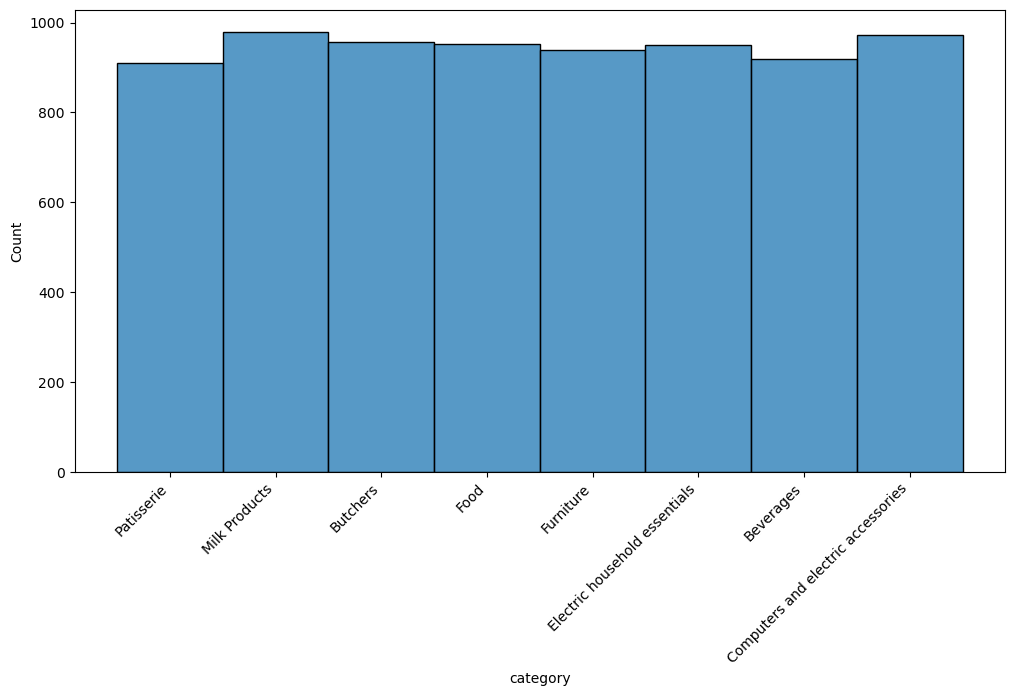

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df['category'])
plt.xticks(rotation=45, ha='right')